# Stats

Some easy numbers about habits

# % of scrobbles with attached URIs

97.01% joined scrobbles


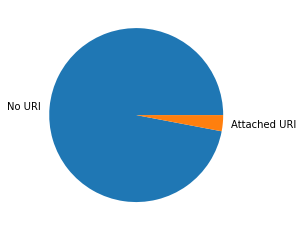

In [36]:
no_uri = (
    'SELECT ' 
    '   COUNT(track) '
    'FROM `sarsooxyz.scrobbles.*` '
    'WHERE '
    '  uri IS NOT NULL '
)

uri = (
    'SELECT ' 
    '   COUNT(track) '
    'FROM `sarsooxyz.scrobbles.*` '
)

no_uri_count = list(client.query(no_uri).result())[0][0]
uri_count = list(client.query(uri).result())[0][0]

print(f'{( no_uri_count / uri_count ) * 100:.2f}% joined scrobbles')
plt.pie([no_uri_count, uri_count - no_uri_count], labels=["No URI", "Attached URI"])
plt.show()

## Most listened to unjoined tracks

Tracks without uris to allow Last.fm -> Spotify join

In [5]:
print(len(scrobbles[scrobbles['uri'].isnull()].drop_duplicates(["artist", "track"])), "missing tracks")
scrobbles[scrobbles['uri'].isnull()].groupby(["artist", "track"]).count()["album"].sort_values(ascending=False).head(20)

818 missing tracks


artist               track                                     
Wiley                Bring Them All / Holy Grime (feat. Devlin)    54
Freddie Gibbs        What It B Like                                36
Travi$ Scott         Hell of a Night                               35
The Black Eyed Peas  Street Livin'                                 35
Gorgon City          Ready for Your Love (feat. MNEK)              33
                     Unmissable (feat. Zak Abel)                   33
Freddie Gibbs        How We Do ('93 Til Freestyle #3)              31
SUMR CAMP            Words                                         28
Freddie Gibbs        Flamboyant (Freestyle #2)                     28
Joey Bada$$          Legendary (feat. J. Cole)                     27
GZA/Genius           Gold                                          26
Tchami               World To Me (feat. Luke James)                25
                     Godspell (feat. Taiki Nulight)                24
Prodigy & Alchemist  IMDKV

In [1]:
from google.cloud import bigquery
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from analysis.query import *
from analysis.net import get_spotnet
from spotframework.model.uri import Uri
import string

load_dotenv()

client = bigquery.Client()
spotnet = get_spotnet()
cache = 'query.csv'

## Read Scrobble Frame

In [2]:
scrobbles = get_query(cache=cache)

query.csv not found, pulling


## Write Scrobble Frame

In [4]:
scrobbles.reset_index().to_csv(cache, sep='\t')